<a href="https://colab.research.google.com/github/NguyenMai2001/handleData/blob/main/tray_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

 clf.pkl                                  weights_jig_1.h5   y_jig_1.pickel
 CNN_tray.ipynb                           weights_jig.h5     y_jig.pickel
 logistic.ipynb                           X_jig_1.pickel     y_log.pickel
'tray Convolutions + Max Pooling.ipynb'   X_jig.pickel       y_new.pkl
'tray logistic.ipynb'                     X_log.pickel       y.pkl
 VGG16.ipynb                              X_new.pkl
 weights.h5                               X.pkl


In [ ]:
cd /content/drive/MyDrive/ML_lab/tray_test

/content/drive/MyDrive/ML_lab/tray_test


In [ ]:
ls

 clf.pkl                                  weights_jig_1.h5   y_jig_1.pickel
 CNN_tray.ipynb                           weights_jig.h5     y_jig.pickel
 logistic.ipynb                           X_jig_1.pickel     y_log.pickel
'tray Convolutions + Max Pooling.ipynb'   X_jig.pickel       y_new.pkl
'tray logistic.ipynb'                     X_log.pickel       y.pkl
 VGG16.ipynb                              X_new.pkl
 weights.h5                               X.pkl


In [ ]:
import sklearn
import pickle
import cv2
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
data = './'
X = data + 'X_new.pkl'
y = data + 'y_new.pkl'

with open(X, mode='rb') as f:
  X = pickle.load(f)

with open(y, mode='rb') as f:
  y = pickle.load(f)

In [ ]:
X.shape

(7698, 27, 31, 3)

In [ ]:
X

array([[[[ 62,  53,  50],
         [ 75,  62,  57],
         [ 80,  65,  61],
         ...,
         [ 32,  26,  22],
         [ 32,  26,  23],
         [ 85,  79,  76]],

        [[ 62,  56,  52],
         [ 78,  65,  59],
         [ 79,  63,  58],
         ...,
         [ 32,  26,  22],
         [ 33,  26,  22],
         [ 80,  75,  70]],

        [[ 63,  56,  52],
         [ 76,  65,  59],
         [ 74,  60,  54],
         ...,
         [ 31,  26,  22],
         [ 35,  29,  24],
         [ 80,  73,  67]],

        ...,

        [[ 70,  59,  53],
         [ 75,  61,  54],
         [ 92,  77,  69],
         ...,
         [ 69,  58,  52],
         [ 77,  65,  57],
         [ 80,  69,  61]],

        [[ 72,  60,  53],
         [ 82,  67,  59],
         [111,  94,  87],
         ...,
         [ 46,  38,  31],
         [ 78,  69,  61],
         [ 77,  67,  58]],

        [[ 76,  61,  55],
         [103,  84,  77],
         [ 79,  59,  54],
         ...,
         [ 35,  29,  24],
        

In [ ]:
X = X.astype(np.uint8)

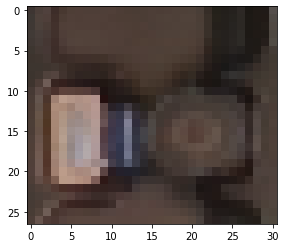

(27, 31, 3)


In [ ]:
plt.imshow(X[0])
plt.show()
print(X[0].shape)

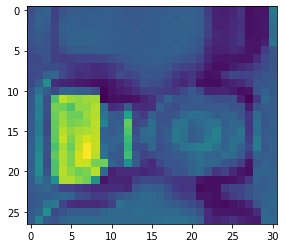

(27, 31)


In [ ]:
gray_tray = cv2.cvtColor(X[0], cv2.COLOR_BGR2GRAY)
plt.imshow(gray_tray)
plt.show()
print(gray_tray.shape)

In [ ]:
X_tray = []
for i in range(len(X)):
  gray_tray = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)
  X_tray.append(gray_tray)

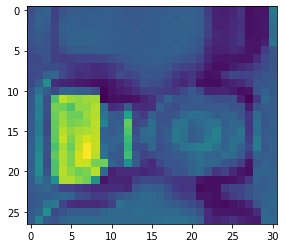

(7698, 27, 31)

In [ ]:
plt.imshow(X_tray[0])
plt.show()
X_tray= np.array(X_tray)
X_tray.shape

In [ ]:
X_tray = np.array(X_tray).reshape(-1,27*31)
X_tray.shape

(7698, 837)

In [ ]:
X_tray = X_tray[:1000]
y = y[:1000]

In [ ]:
def draw_sample_label(X,y,ypred=None):
    X = X[:12]
    y = y[:12]
    plt.subplots(3,4)
    for i in range(len(X)):
        plt.subplot(3,4,i+1)
        plt.imshow(X[i].reshape(27,31), cmap='gray')
        if ypred is None:
            plt.title(f'y={y[i]}')
        else:
            plt.title(f'y={y[i]} ypred={ypred[i]}')
    plt.show()

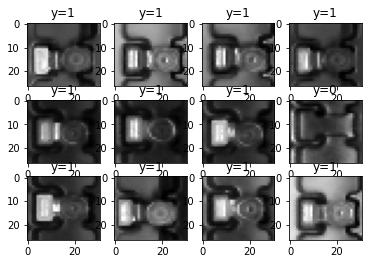

In [ ]:
draw_sample_label(X_tray,y)

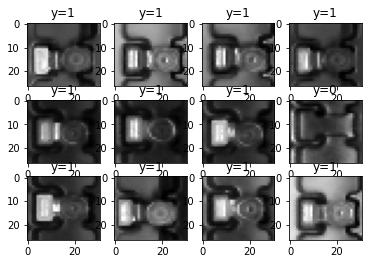

In [ ]:

xtr, xte, ytr, yte = train_test_split(X_tray, y, test_size=0.33, random_state=101)
# print(X,y)
# print(X.shape)
# print(y.shape)
# print(xtr)
# print(xtr.shape)
# print(xte.shape)
# print(ytr.shape)
# print(yte.shape)

# plt.imshow(X[1].reshape((360,640)), cmap='gray')
# plt.show()


n = 162
d = 230400
height, weight = 1080, 1920

draw_sample_label(X_tray,y)

clf = LogisticRegression(max_iter=10000)
clf.fit(xtr,ytr)

# ypred = clf.predict(xte)
# print(ypred)
#print(f"error rate {(yte!=ypred).sum() / len(yte)*100:2f}%")
# mask = yte != ypred
# draw_sample_label(xte[mask], yte[mask], ypred[mask])

#luu clf
with open('clf_tray.pkl', 'wb') as f:
    pickle.dump(clf, f)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
error rate 0.000000%


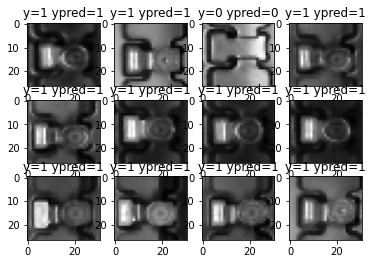

In [ ]:
ypred = clf.predict(xte)
print(ypred)
print(f"error rate {(yte!=ypred).sum() / len(yte)*100:2f}%")
# mask = yte != ypred
# draw_sample_label(xte[mask], yte[mask], ypred[mask])
draw_sample_label(xte, yte, ypred)
